# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Chosen dataset

[Loan Data](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)

[Prosper Data Dictionary to Explain Dataset's Variables](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)  

[extra Info](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:

# url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
# url = "http://ww2.amstat.org/sections/graphics/datasets/DataExpo2009.zip"

url = 'prosperLoanData.csv'

In [3]:
df = pd.read_csv(url)

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [6]:
(df.isnull().sum() > 2000)

ListingKey                     False
ListingNumber                  False
ListingCreationDate            False
CreditGrade                     True
Term                           False
                               ...  
PercentFunded                  False
Recommendations                False
InvestmentFromFriendsCount     False
InvestmentFromFriendsAmount    False
Investors                      False
Length: 81, dtype: bool

In [7]:
df.shape

(113937, 81)

In [8]:
nulls = (df.isnull().sum() > 2000)
dfc = df.drop( nulls[nulls == True].index, axis=1 ) 

# nulls[nulls == True], nulls[nulls == False], dfc.head()

In [9]:
dfc.shape

(113937, 48)

In [10]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 48 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ListingKey                       113937 non-null  object 
 1   ListingNumber                    113937 non-null  int64  
 2   ListingCreationDate              113937 non-null  object 
 3   Term                             113937 non-null  int64  
 4   LoanStatus                       113937 non-null  object 
 5   BorrowerAPR                      113912 non-null  float64
 6   BorrowerRate                     113937 non-null  float64
 7   LenderYield                      113937 non-null  float64
 8   ListingCategory (numeric)        113937 non-null  int64  
 9   IsBorrowerHomeowner              113937 non-null  bool   
 10  CurrentlyInGroup                 113937 non-null  bool   
 11  DateCreditPulled                 113937 non-null  object 
 12  Cr

In [11]:
dfc.duplicated().sum()

871

In [12]:
dfc.drop_duplicates(inplace=True)
dfc.duplicated().sum()

0

I have a feelin that there are columns that are copies of other columns

In [13]:
corr = dfc.corr()
corr_keys = corr.keys()
duplicated_columns = []
for c1 in dfc.columns:
  for c2 in dfc.columns:

    if c1 in corr_keys and c2 in corr_keys and c1 != c2 and corr[c1][c2] == 1:
      duplicated_columns.append((c1,c2,))  

print(f'columns seem suplicates {duplicated_columns}')

columns seem suplicates [('CreditScoreRangeLower', 'CreditScoreRangeUpper'), ('CreditScoreRangeUpper', 'CreditScoreRangeLower')]


In [14]:
dfc.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,True,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,False,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,0,False,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,True,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,True,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [15]:
u_sum = len(dfc.LoanKey.unique())

u_sum == dfc.shape[0]


True

In [16]:
dfc.drop(columns=['LoanKey', 'MemberKey', 'LoanNumber', 'ListingCreationDate', 'ListingNumber', 'ListingKey'], inplace=True)

In [17]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Term                             113066 non-null  int64  
 1   LoanStatus                       113066 non-null  object 
 2   BorrowerAPR                      113041 non-null  float64
 3   BorrowerRate                     113066 non-null  float64
 4   LenderYield                      113066 non-null  float64
 5   ListingCategory (numeric)        113066 non-null  int64  
 6   IsBorrowerHomeowner              113066 non-null  bool   
 7   CurrentlyInGroup                 113066 non-null  bool   
 8   DateCreditPulled                 113066 non-null  object 
 9   CreditScoreRangeLower            112475 non-null  float64
 10  CreditScoreRangeUpper            112475 non-null  float64
 11  FirstRecordedCreditLine          112369 non-null  object 
 12  To

In [18]:
loan_status = pd.get_dummies( dfc.LoanStatus)
dfc[loan_status.columns] = loan_status

In [19]:
loan_status.head()

,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [20]:
corr = dfc.corr()
corr_keys = corr.keys()
related = []
for c1 in dfc.columns:
  for c2 in dfc.columns:

    if c1 in corr_keys and c2 in corr_keys and c1 != c2 and corr[c1][c2] > 0.8 and corr[c1][c2] != 1:
      related.append((c1,c2, corr[c1][c2]))  

for r in related:
  print(f'columns related {r}')
# print (corr['Cancelled'])
# print (corr['Completed'])
# print (corr['Defaulted'])
# print (corr['Chargedoff'])
# print (corr['Current'])
# print (corr['FinalPaymentInProgress'])
# print (corr['Past Due (1-15 days)'])
# print (corr['Past Due (16-30 days)'])
# print (corr['Past Due (31-60 days)'])
# print (corr['Past Due (61-90 days)'])
# print (corr['Past Due (91-120 days)'])
# print (corr['Past Due (>120 days)'])
print("")

columns related ('BorrowerAPR', 'BorrowerRate', 0.9898166640352847)
columns related ('BorrowerAPR', 'LenderYield', 0.9893194067320616)
columns related ('BorrowerRate', 'BorrowerAPR', 0.9898166640352847)
columns related ('BorrowerRate', 'LenderYield', 0.9992073582842463)
columns related ('LenderYield', 'BorrowerAPR', 0.9893194067320616)
columns related ('LenderYield', 'BorrowerRate', 0.9992073582842463)
columns related ('LoanCurrentDaysDelinquent', 'Chargedoff', 0.8111961809162036)
columns related ('LoanOriginalAmount', 'MonthlyLoanPayment', 0.931856487514736)
columns related ('MonthlyLoanPayment', 'LoanOriginalAmount', 0.931856487514736)
columns related ('LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 0.9773696675632677)
columns related ('LP_CustomerPrincipalPayments', 'LP_CustomerPayments', 0.9773696675632677)
columns related ('LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 0.9928166223496594)
columns related ('LP_NetPrincipalLoss', 'LP_GrossPrincipalLoss', 0.9928166223496594)


In [21]:
display(dfc.head(10))
dfc.tail(10)


,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,...,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
0,36,Completed,0.16516,0.1580,0.1380,0,True,True,2007-08-26 18:41:46.780000000,640.0,...,1,0,0,0,0,0,0,0,0,0
1,36,Current,0.12016,0.0920,0.0820,2,False,False,2014-02-27 08:28:14,680.0,...,0,1,0,0,0,0,0,0,0,0
2,36,Completed,0.28269,0.2750,0.2400,0,False,True,2007-01-02 14:09:10.060000000,480.0,...,1,0,0,0,0,0,0,0,0,0
3,36,Current,0.12528,0.0974,0.0874,16,True,False,2012-10-22 11:02:32,800.0,...,0,1,0,0,0,0,0,0,0,0
4,36,Current,0.24614,0.2085,0.1985,2,True,False,2013-09-14 18:38:44,680.0,...,0,1,0,0,0,0,0,0,0,0
5,60,Current,0.15425,0.1314,0.1214,1,True,False,2013-12-14 08:26:40,740.0,...,0,1,0,0,0,0,0,0,0,0
6,36,Current,0.31032,0.2712,0.2612,1,False,False,2013-04-12 09:52:53,680.0,...,0,1,0,0,0,0,0,0,0,0
7,36,Current,0.23939,0.2019,0.1919,2,False,False,2013-05-05 06:49:25,700.0,...,0,1,0,0,0,0,0,0,0,0
8,36,Current,0.07620,0.0629,0.0529,7,True,False,2013-12-02 10:43:39,820.0,...,0,1,0,0,0,0,0,0,0,0
10,60,Current,0.27462,0.2489,0.2389,1,False,False,2012-04-22 08:38:09,640.0,...,0,1,0,0,0,0,0,0,0,0


,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,...,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
113927,36,Completed,0.07469,0.0679,0.0579,4,True,True,2008-04-30 21:20:54.587000000,760.0,...,1,0,0,0,0,0,0,0,0,0
113928,36,Completed,0.22362,0.1899,0.1799,3,False,False,2011-06-03 16:06:00,740.0,...,1,0,0,0,0,0,0,0,0,0
113929,36,Completed,0.30285,0.2639,0.2539,2,False,False,2013-07-06 17:39:52,660.0,...,1,0,0,0,0,0,0,0,0,0
113930,36,Current,0.20053,0.1639,0.1539,1,True,False,2013-07-08 10:24:38,680.0,...,0,1,0,0,0,0,0,0,0,0
113931,60,Current,0.15016,0.1274,0.1174,3,False,False,2014-01-03 10:17:23,800.0,...,0,1,0,0,0,0,0,0,0,0
113932,36,Current,0.22354,0.1864,0.1764,1,True,False,2013-04-14 05:54:58,700.0,...,0,1,0,0,0,0,0,0,0,0
113933,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,7,True,False,2011-11-03 20:42:53,700.0,...,0,0,0,1,0,0,0,0,0,0
113934,60,Current,0.23984,0.2150,0.2050,1,True,False,2013-12-13 05:49:15,700.0,...,0,1,0,0,0,0,0,0,0,0
113935,60,Completed,0.28408,0.2605,0.2505,2,True,False,2011-11-14 13:18:24,680.0,...,1,0,0,0,0,0,0,0,0,0
113936,36,Current,0.13189,0.1039,0.0939,1,False,False,2014-01-15 09:27:40,680.0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
dfc.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,...,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
count,113066.000000,113041.000000,113066.000000,113066.000000,113066.000000,112475.000000,112475.000000,112369.000000,113066.000000,113066.000000,...,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000
mean,40.800170,0.218980,0.192946,0.182882,2.776838,685.524961,704.524961,26.746380,6.959466,397.820998,...,0.336626,0.492898,0.044381,0.001795,0.007076,0.002344,0.003193,0.002751,0.002689,0.000142
std,10.421518,0.080483,0.074917,0.074612,3.998188,66.635895,66.635895,13.643731,4.629303,447.657266,...,0.472558,0.499952,0.205941,0.042334,0.083818,0.048356,0.056415,0.052374,0.051783,0.011895
min,12.000000,0.006530,0.000000,-0.010000,0.000000,0.000000,19.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.156290,0.134000,0.124500,1.000000,660.000000,679.000000,17.000000,4.000000,113.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.209840,0.184000,0.174000,1.000000,680.000000,699.000000,25.000000,6.000000,271.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,0.283860,0.250600,0.240600,3.000000,720.000000,739.000000,35.000000,9.000000,525.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,0.512290,0.497500,0.492500,20.000000,880.000000,899.000000,136.000000,51.000000,14985.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
dfc.IncomeRange.value_counts(), dfc.IncomeRange.value_counts().keys()

($25,000-49,999    31940
 $50,000-74,999    30749
 $100,000+         17188
 $75,000-99,999    16780
 Not displayed      7741
 $1-24,999          7241
 Not employed        806
 $0                  621
 Name: IncomeRange, dtype: int64,
 Index(['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999',
        'Not displayed', '$1-24,999', 'Not employed', '$0'],
       dtype='object'))

In [24]:
IncomeRanceType = pd.api.types.CategoricalDtype(['$0', 'Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 
          ], ordered=True)

dfc.IncomeRange = dfc.IncomeRange.astype(IncomeRanceType)

In [25]:
dfc.IncomeVerifiable.value_counts()

True     104479
False      8587
Name: IncomeVerifiable, dtype: int64

In [26]:
dfc.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

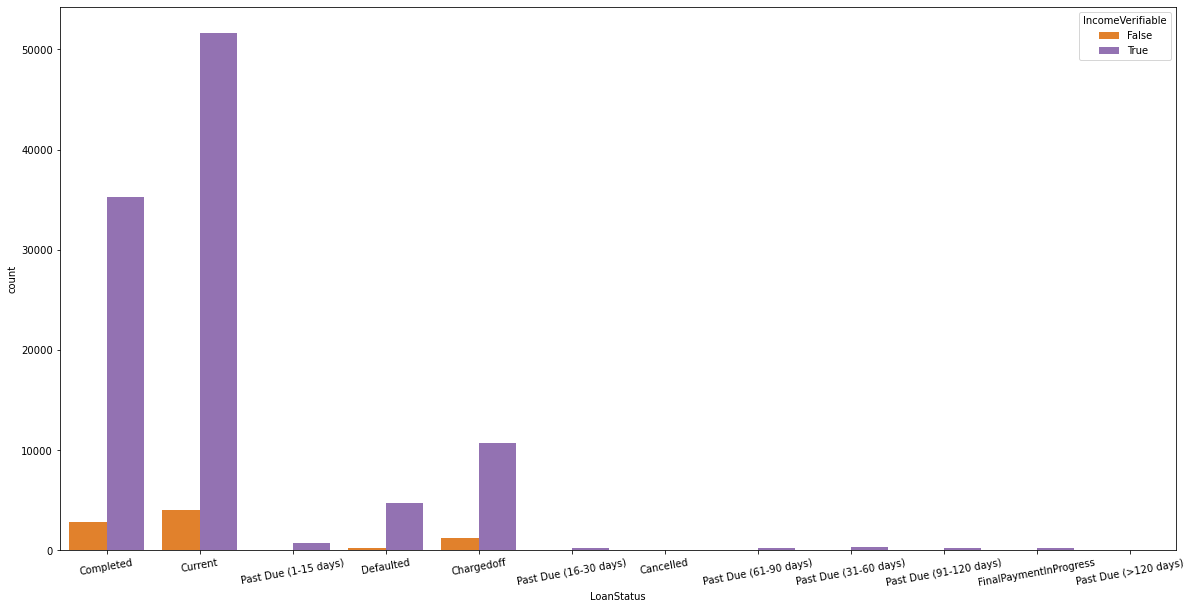

In [27]:
pal = np.array(sb.color_palette())
plt.rcParams['figure.figsize'] = (20, 10)

sb.countplot(x='LoanStatus',  hue='IncomeVerifiable', data=dfc, palette=pal[[1,4]], )
plt.xticks(rotation=10);


/tmp/ipykernel_806/4079286984.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sb.countplot(x='LoanStatus',  hue='IncomeRange', data=dfc, palette=pal[[...]], )


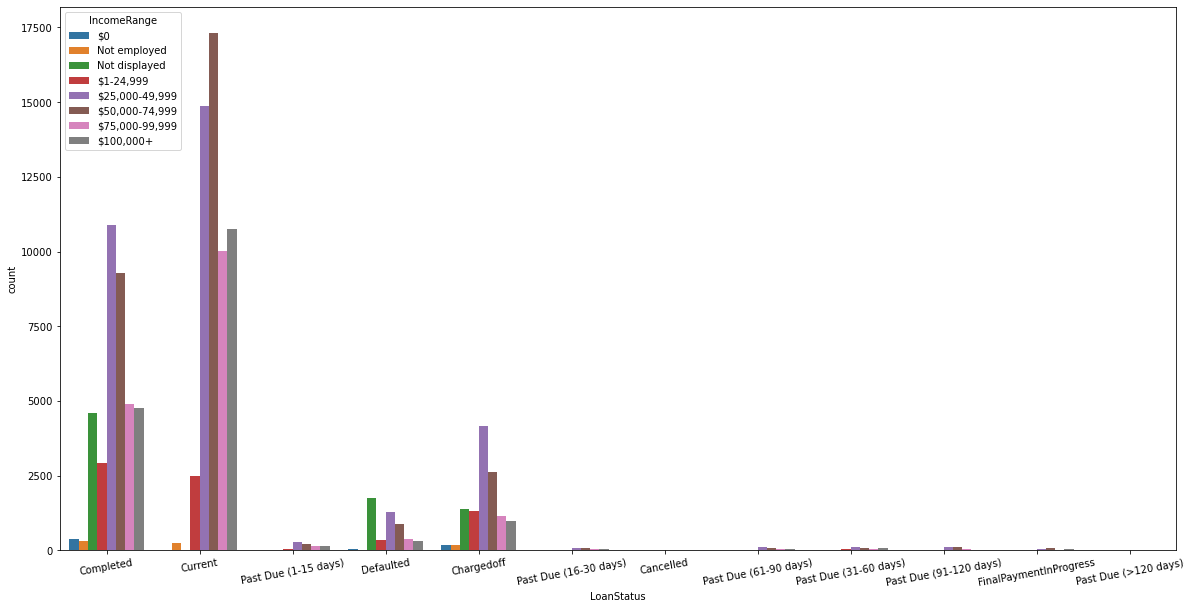

In [28]:
sb.countplot(x='LoanStatus',  hue='IncomeRange', data=dfc, palette=pal[[...]], )
plt.xticks(rotation=10);

NOt all data is useful
get the most relevent columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

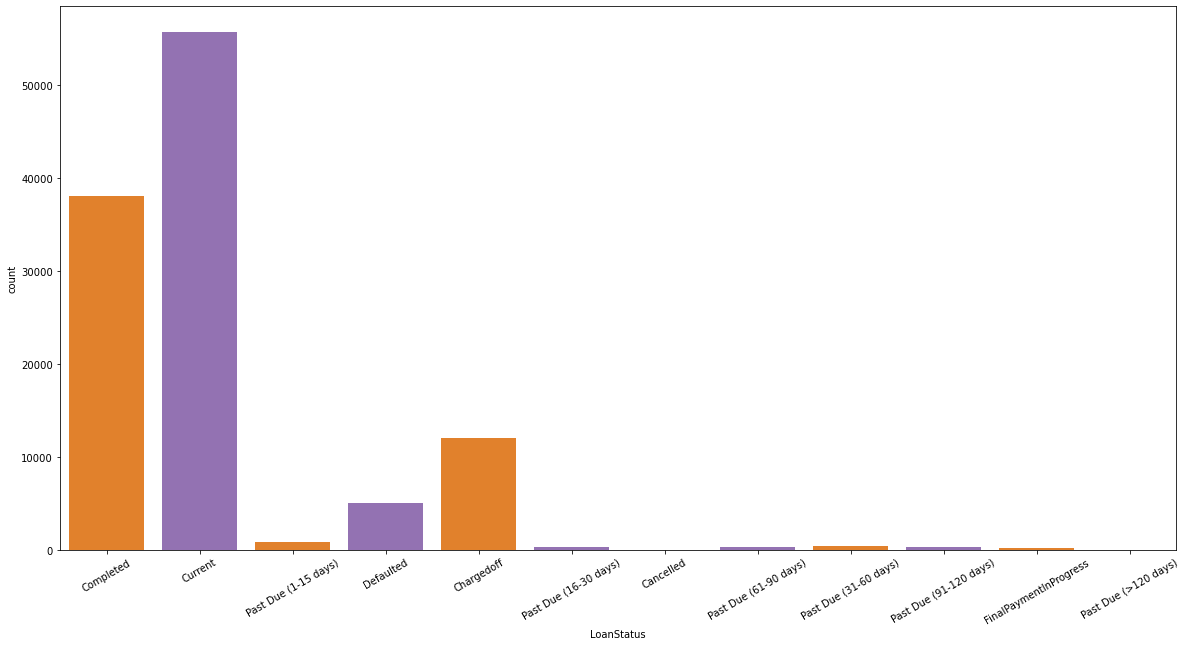

In [29]:
pal = np.array(sb.color_palette())

sb.countplot(x='LoanStatus', data=dfc, palette=pal[[1,4]])
plt.xticks(rotation=30)

In [30]:
# pd.plotting.scatter_matrix(dfc)

### What is the structure of your dataset?

> Your answer here!

Loanstatus is catagorical, Brower income in catagorical

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

LoanStatus, and Brower income

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

LoanStatus, and Brower income



## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

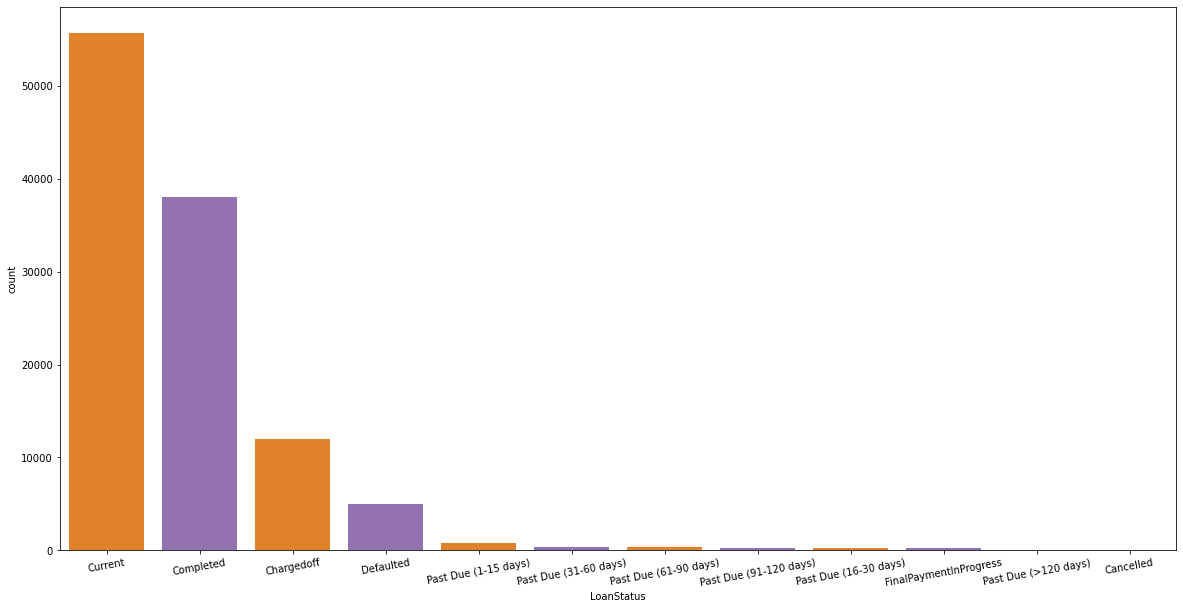

In [31]:
pal = np.array(sb.color_palette())
plt.rcParams['figure.figsize'] = (20, 10)

sb.countplot(x='LoanStatus', data=dfc, palette=pal[[1,4]], order=dfc.LoanStatus.value_counts().index)
plt.xticks(rotation=10);


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

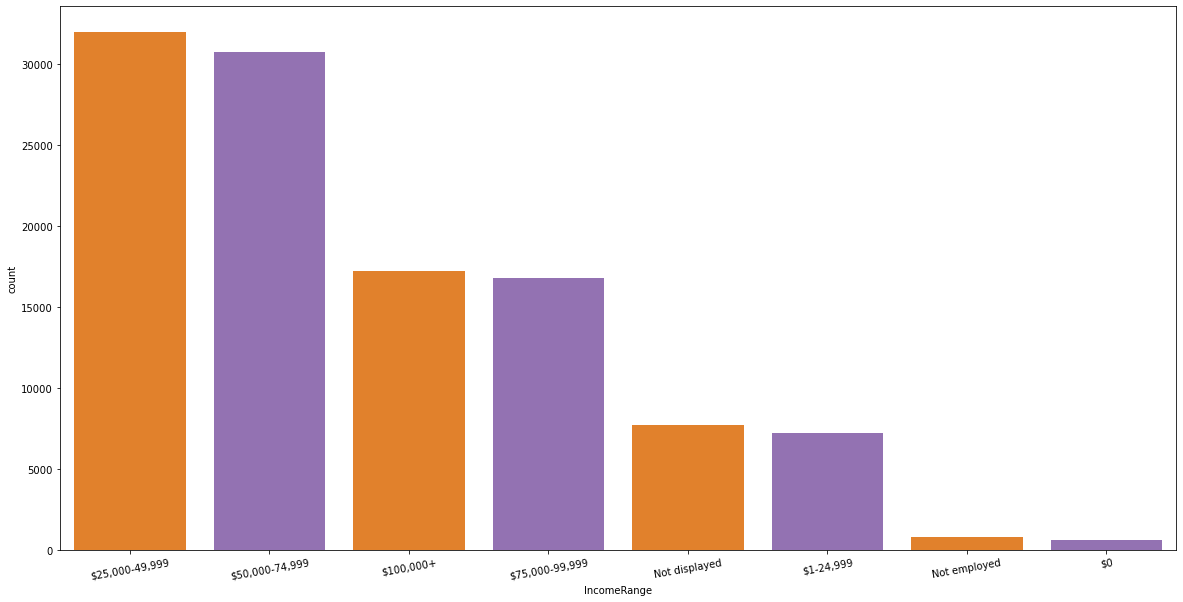

In [32]:
sb.countplot(x='IncomeRange', data=dfc, palette=pal[[1,4]],  order=dfc['IncomeRange'].value_counts().index)
plt.xticks(rotation=10);


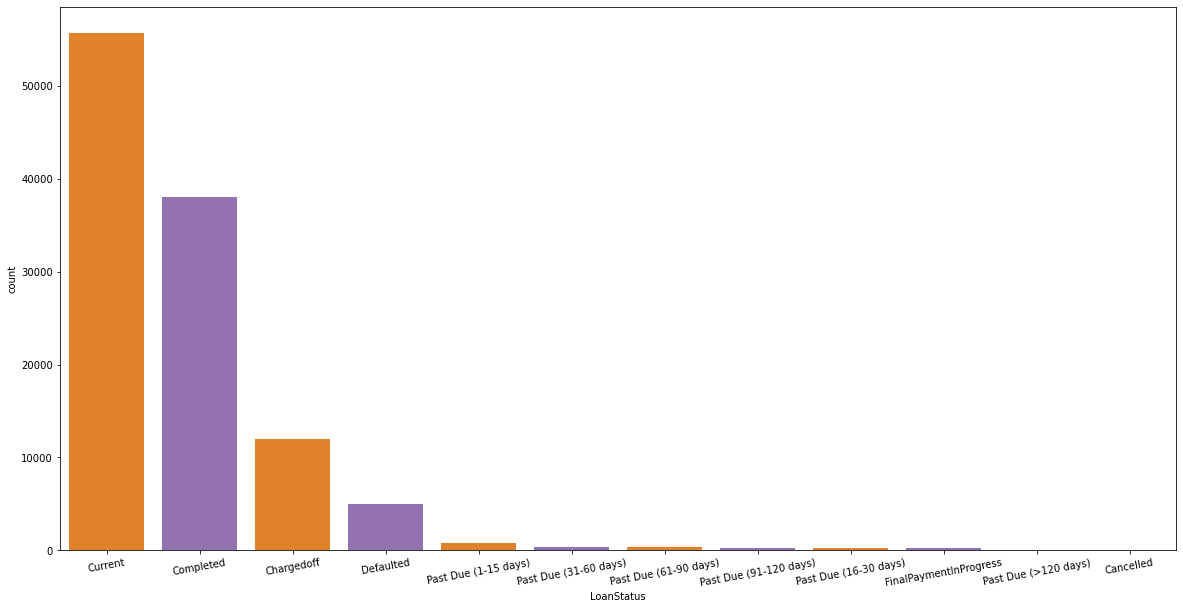

In [33]:
sb.countplot(x='LoanStatus', data=dfc, palette=pal[[1,4]],  order=dfc['LoanStatus'].value_counts().index)
plt.xticks(rotation=10);


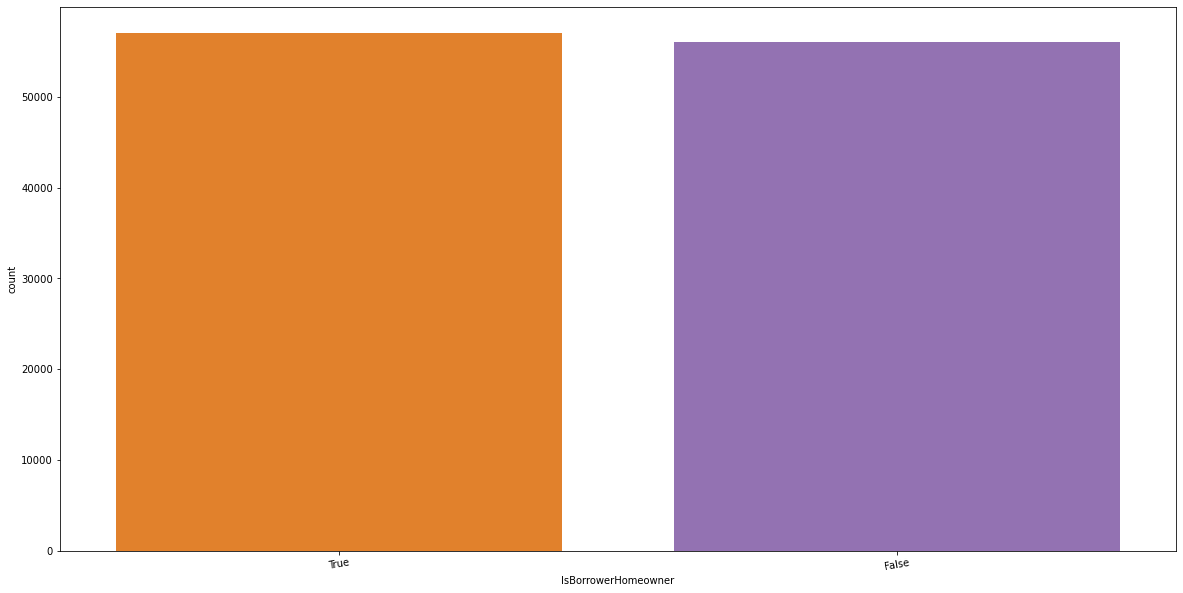

In [34]:
sb.countplot(x='IsBorrowerHomeowner', data=dfc, palette=pal[[1,4]],  order=dfc['IsBorrowerHomeowner'].value_counts().index)
plt.xticks(rotation=10);


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

I needed to use dummies for LoanStatus

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

most of the borrowers are between 25k to 75k of income

LoanStatus, and Brower income

I needed to use dummies for LoanStatus for further exploration


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

/tmp/ipykernel_806/1159577133.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sb.countplot(x='LoanStatus',  hue='IncomeRange', data=dfc,  palette=pal[[...]], )


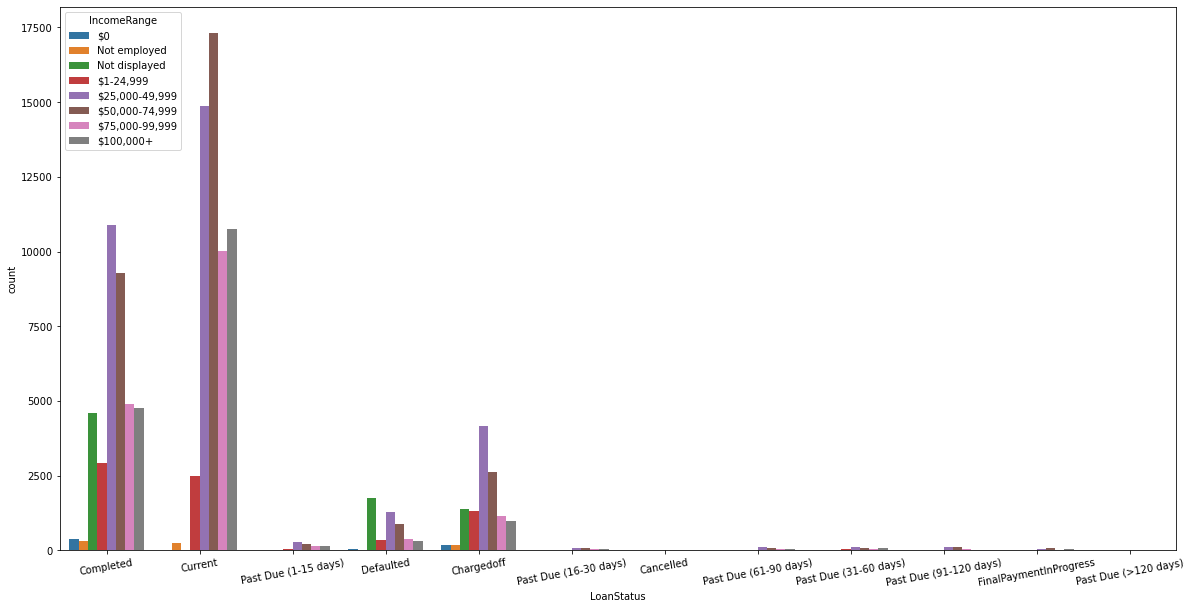

In [35]:
sb.countplot(x='LoanStatus',  hue='IncomeRange', data=dfc,  palette=pal[[...]], )
plt.xticks(rotation=10);

/tmp/ipykernel_806/2885042249.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fig = sb.barplot(x='LoanStatus', y='intercept', hue='IncomeRange', data=inter,  palette=pal[[...]])


Text(0.5, 1.0, 'loan status proportion')

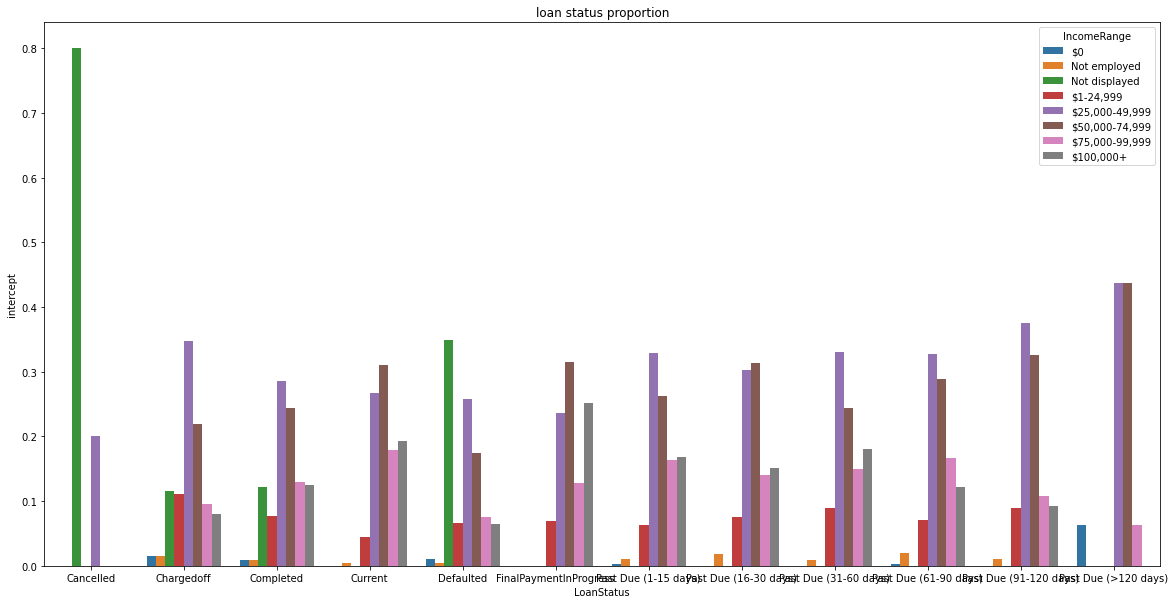

In [36]:
dfc['intercept'] = 1
prop = dfc.groupby(['LoanStatus', 'IncomeRange']).count()/ dfc.groupby('LoanStatus').count()
inter = prop.intercept.reset_index()
inter = inter.replace(np.nan, 0)
inter
# inter.plot(kind='bar', )
# prop[loan_status.columns]
fig = sb.barplot(x='LoanStatus', y='intercept', hue='IncomeRange', data=inter,  palette=pal[[...]])
fig.set_title("loan status proportion")
# plt.xticks(rotation=10)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

I am interested on how the employment status affect the loan status


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

I observed that the not displayed income is very interesting it has a very significant high defaulting rate as well as cancelation rate followed by the category of 25K-50K income,
While zero income and not employed has the lowest defaulting rate

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/tmp/ipykernel_806/664127988.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sb.barplot(x='LoanStatus', y="LenderYield" , hue='IncomeRange', data=dfc,  palette=pal[[...]])


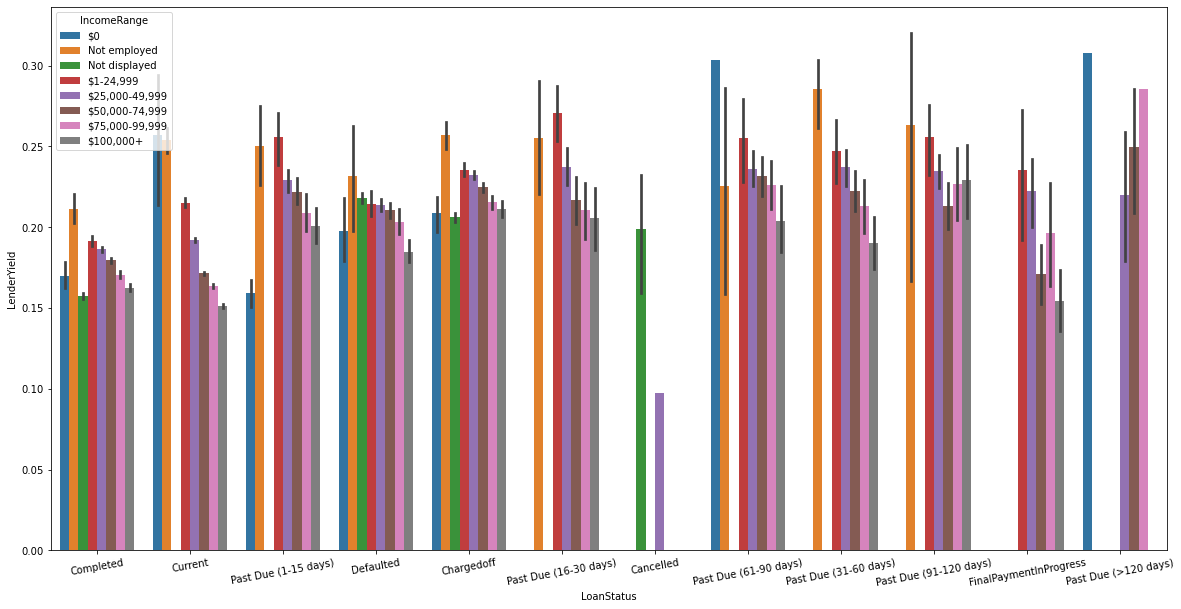

In [37]:
# sb.stripplot(x='LoanStatus', y="ListingCategory (numeric)" , hue='IncomeRange', data=dfc,  palette=pal[[...]], jitter=0.3)
sb.barplot(x='LoanStatus', y="LenderYield" , hue='IncomeRange', data=dfc,  palette=pal[[...]])
plt.xticks(rotation=10);



/tmp/ipykernel_806/3661964872.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fig = sb.barplot(x='LoanStatus', y='LenderYield', hue='IsBorrowerHomeowner', data=dfc,  palette=pal[[...]])


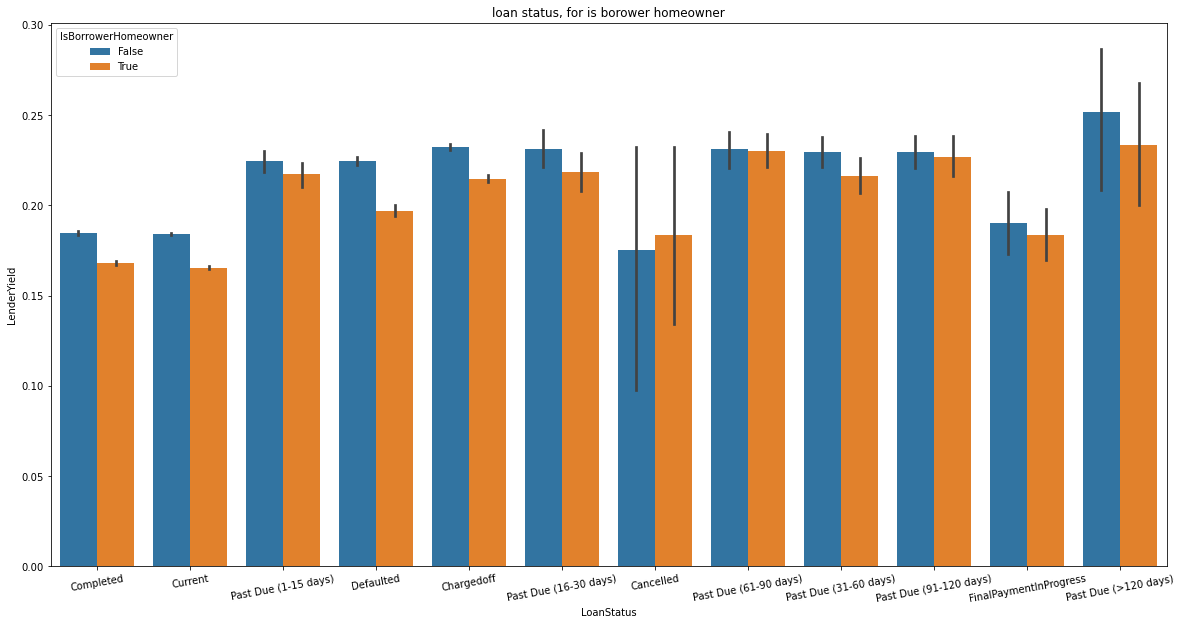

In [38]:


# dfs1 = pd.melt(dfs, id_vars = "LoanStatus")


# sb.stripplot(x='LoanStatus', y="LenderYield" , hue='IncomeRange', data=dfc,  palette=pal[[...]], jitter=0.3)
fig = sb.barplot(x='LoanStatus', y='LenderYield', hue='IsBorrowerHomeowner', data=dfc,  palette=pal[[...]])
# sb.barplot
fig.set_title("loan status, for is borower homeowner")
plt.xticks(rotation=10);



/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


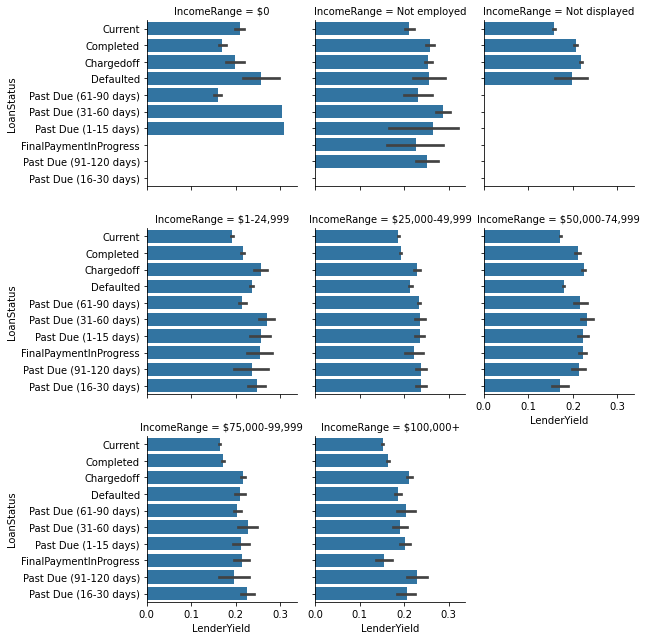

In [39]:
# "IsBorrowerHomeowner"

g = sb.FacetGrid(dfc, col="IncomeRange", col_wrap=3)
g.map(sb.barplot, "LenderYield", "LoanStatus")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

I can't very much get the data 
But it seams that the lender yield have a lower variance for people with incomrange 25K-50k


### Were there any interesting or surprising interactions between features?

> Your answer here!

 it seams that the lender yield have a lower variance for people with incomrange 25K-50k

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [41]:
print('done')
# raise "Stop"

done


In [44]:

!jupyter nbconvert exploration_template.ipynb --to html


[NbConvertApp] Converting notebook exploration_template.ipynb to html
[NbConvertApp] Writing 1159445 bytes to exploration_template.html
